In [1]:
# ACP Topic (aka Iris 4)
import visualID_Eng as vID
from visualID import color
vID.init()

**Start at:** Thursday 30 June 2022, 12:35:16  
**Hostname:** localhost.localdomain (Linux)

<p style="text-align: center"><img width="800px" src="./svg/logoPytChem.svg" style="margin-left:auto; margin-right:auto"/></p>

# Statistical treatment of data<br>(data science for beginners)
## 4. Principal Component Analysis (PCA)

<div class="rq">

Principal component analysis (PCA) is a statistical procedure that uses an orthogonal transformation to **convert** a set of observations of **possibly correlated variables** into a set of values of **linearly uncorrelated variables** called **principal components** (PC). 
    
It helps you interpret your data and simplifies the complexity in high-dimensional data while retaining trends and patterns. It does this by transforming the data into fewer dimensions, which act as summaries of features. It can be seen as a compression algorithm.
    
This transformation is defined in such a way that the first principal component has the largest possible variance, and each succeeding component in turn has the highest variance possible under the constraint that it is orthogonal to the preceding components. The resulting vectors (each being a linear combination of the variables and containing *n* observations) are an uncorrelated orthogonal basis set.

PCA is sensitive to the relative scaling of the original variables
    
(*From Wikipedia*)
</div>

### 4.1. PCA in a nutshell

#### 4.1.a. Library import

In [2]:
%matplotlib inline
import pandas as pd
import matplotlib as mp
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

In [3]:
dfi=pd.read_csv('./iris-data/iris.csv', sep=";") 
print(f"Dfi. Structure (shape) :{dfi.shape}")
display(dfi)

Dfi. Structure (shape) :(150, 5)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


The clusters are extremely easy to see, the data requires no preprocessing, and there are only 3 targets, corresponding to the clusters above:

Iris setosa (Blue), Iris Versicolor (Orange), and Iris virginica (Green)

Note that species 0 (blue dots) is clearly separated in all these plots, but species 1 (green dots) and species 2 (yellow dots) are harder to separate

Because the features in the Iris dataset are on totally different scales (e.g. the sepal lengths are much longer than the petal widths), we need to scale them so that the new principal components treat all features equally via singular value decomposition.

#### 4.1.b. Standardization

In [4]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()

features=dfi[['sepal_length','sepal_width','petal_length','petal_width']]
y=dfi[['species']]
scaler.fit(features.values)
featuresS = scaler.transform(features.values) #returns a numpy array
#conversion into a dataframe just for display and plotting purpose
featuresSDF = pd.DataFrame(featuresS, columns=features.columns, index=features.index)

display(featuresSDF.describe().style.format("{0:.2f}").set_caption("features after standardization"))

,sepal_length,sepal_width,petal_length,petal_width
count,150.00,150.00,150.00,150.00
mean,-0.00,-0.00,0.00,0.00
std,1.00,1.00,1.00,1.00
min,-1.87,-2.44,-1.57,-1.44
25%,-0.90,-0.59,-1.23,-1.18
50%,-0.05,-0.12,0.34,0.13
75%,0.67,0.57,0.76,0.79
max,2.49,3.11,1.79,1.71


The explained variance ratio tells us how much information (variance) can be attributed to each of the principal components

#### 4.1.c. PCA
##### PCA fit

In [5]:
pca = PCA(0.98)
featuresSPCA = pca.fit_transform(featuresS)

##### Explained variance ratio

explained variance ratio: [0.72770452 0.23030523 0.03683832]


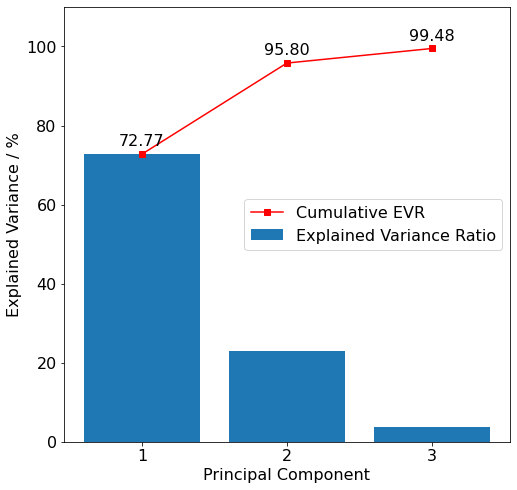

In [6]:
plt.rcParams["figure.figsize"] = (8,8)
plt.rcParams["font.size"] = (16)
print(f"explained variance ratio: {pca.explained_variance_ratio_}")

plt.bar(range(1,len(pca.explained_variance_ratio_)+1),pca.explained_variance_ratio_*100, label="Explained Variance Ratio")
plt.plot(range(1,len(pca.explained_variance_ratio_)+1),np.cumsum(pca.explained_variance_ratio_*100), marker='s', c='red', label="Cumulative EVR")
plt.xlabel('Principal Component', size='16')
plt.xticks(range(1,len(pca.explained_variance_ratio_)+1))
plt.ylabel('Explained Variance / %', size='16')
plt.ylim(0,110)
plt.legend()
for i, v in enumerate(np.cumsum(pca.explained_variance_ratio_*100)):
    plt.text(i+1, v+2, f"{v:.2f}", ha="center")
plt.show()

<div class="warn">
    
The first two components capture 95.8% of the information, whereas the first three ones capture 99.5% of it.
    
The 3rd variance is obviously not very significant. And for sure the 4th component (PC4, not shown here) won't be helpful to separate the three species into three classes.
</div>

##### Transformation of the four widths and lengths features into the 3 PCA components

In [1]:
print('Shape before PCA: ', featuresS.shape)
print('Shape after PCA: ', featuresSPCA.shape)

PC=[]
PC = [f"PC{i}" for i in range(1, pca.n_components_+1)]
 
pca_df = pd.DataFrame(data=featuresSPCA,columns=PC, index=dfi.index)
pca_df = pd.concat([pca_df,y],axis=1)
display(pca_df)
display(pca_df.describe().style.format("{0:.2f}").set_caption("Principal Components"))

NameError: name 'featuresS' is not defined

<div class="warn">
The original features have been transformed thanks to this matrix transformation: 
<div>

In [8]:
print(pca.components_)

[[ 0.52237162 -0.26335492  0.58125401  0.56561105]
 [ 0.37231836  0.92555649  0.02109478  0.06541577]
 [-0.72101681  0.24203288  0.14089226  0.6338014 ]]


In [10]:
# PC1=pca_df['PC1']
# PC2=pca_df['PC2']
# PC3=pca_df['PC3']
# c=pca_df['species']
# from mpl_toolkits import mplot3d
# plt.rcParams["figure.figsize"] = (8,8) #graphic size
# fig = plt.figure()
# ax = plt.axes(projection='3d')
# ax.scatter3D(PC1, PC2, PC3)

import plotly.express as px
fig=px.scatter_3d(pca_df, x='PC1', y='PC2', z='PC3',color='species', symbol='species', width=800, height=600)
fig.update_traces(marker=dict(size=3))

### 4.2. Principal components used as features for ML

Dimensionality reduction

#### 4.2.a. Library import

In [11]:
%matplotlib inline
import pandas as pd
import matplotlib as mp
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.utils import np_utils

from sklearn.decomposition import PCA

2022-06-30 12:35:47.291384: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-06-30 12:35:47.291413: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


#### 4.2.b. PCA

##### Reading of data (one hot encoding version)

In [12]:
dfi=pd.read_csv('./iris-data/iris_ohe.csv', sep="\t") 
print(f"Dfi. Structure (shape) :{dfi.shape}")
display(dfi)

Dfi. Structure (shape) :(150, 8)


,sepal_length,sepal_width,petal_length,petal_width,species,setosa,versicolor,virginica
0,5.1,3.5,1.4,0.2,setosa,1.0,0.0,0.0
1,4.9,3.0,1.4,0.2,setosa,1.0,0.0,0.0
2,4.7,3.2,1.3,0.2,setosa,1.0,0.0,0.0
3,4.6,3.1,1.5,0.2,setosa,1.0,0.0,0.0
4,5.0,3.6,1.4,0.2,setosa,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,0.0,0.0,1.0
146,6.3,2.5,5.0,1.9,virginica,0.0,0.0,1.0
147,6.5,3.0,5.2,2.0,virginica,0.0,0.0,1.0
148,6.2,3.4,5.4,2.3,virginica,0.0,0.0,1.0


##### Standardization

In [13]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()

features=dfi[['sepal_length','sepal_width','petal_length','petal_width']]
y=dfi.drop(features.columns, axis=1)
yohe=y.drop('species',axis=1)

scaler.fit(features.values)
featuresS = scaler.transform(features.values) #returns a numpy array
#conversion into a dataframe just for display and plotting purpose
featuresSDF = pd.DataFrame(featuresS, columns=features.columns, index=features.index)

display(featuresSDF.describe().style.format("{0:.2f}").set_caption("features after standardization"))

,sepal_length,sepal_width,petal_length,petal_width
count,150.00,150.00,150.00,150.00
mean,-0.00,-0.00,0.00,0.00
std,1.00,1.00,1.00,1.00
min,-1.87,-2.44,-1.57,-1.44
25%,-0.90,-0.59,-1.23,-1.18
50%,-0.05,-0.12,0.34,0.13
75%,0.67,0.57,0.76,0.79
max,2.49,3.11,1.79,1.71


##### PCA: reduction of 4 features to the number principal components (PC) that contain 96% of the information

In [14]:
pcPCA=0.96
pca = PCA(pcPCA)

featuresSPCA = pca.fit_transform(featuresS)
print(f"Number of components that contain {pcPCA*100:.1f}% of the information: {pca.n_components_}")
print('Shape before PCA: ', featuresS.shape)
print('Shape after PCA: ', featuresSPCA.shape)

PC=[]
PC = [f"PC{i}" for i in range(1, pca.n_components_+1)]
 
pca_df = pd.DataFrame(data=featuresSPCA,columns=PC, index=dfi.index)
pca_df = pd.concat([pca_df,y],axis=1)
display(pca_df)
display(pca_df.describe().style.format("{0:.2f}").set_caption("Principal Components"))

print(f"explained variance ratio: {pca.explained_variance_ratio_}")
print(f"sum of the first two components: {(pca.explained_variance_ratio_[0]+pca.explained_variance_ratio_[1])*100:.2f}%")


Number of components that contain 96.0% of the information: 3
Shape before PCA:  (150, 4)
Shape after PCA:  (150, 3)


,PC1,PC2,PC3,species,setosa,versicolor,virginica
0,-2.264542,0.505704,-0.121943,setosa,1.0,0.0,0.0
1,-2.086426,-0.655405,-0.227251,setosa,1.0,0.0,0.0
2,-2.367950,-0.318477,0.051480,setosa,1.0,0.0,0.0
3,-2.304197,-0.575368,0.098860,setosa,1.0,0.0,0.0
4,-2.388777,0.674767,0.021428,setosa,1.0,0.0,0.0
...,...,...,...,...,...,...,...
145,1.870522,0.382822,0.254532,virginica,0.0,0.0,1.0
146,1.558492,-0.905314,-0.025382,virginica,0.0,0.0,1.0
147,1.520845,0.266795,0.179277,virginica,0.0,0.0,1.0
148,1.376391,1.016362,0.931405,virginica,0.0,0.0,1.0


,PC1,PC2,PC3,setosa,versicolor,virginica
count,150.00,150.00,150.00,150.00,150.00,150.00
mean,0.00,0.00,0.00,0.33,0.33,0.33
std,1.71,0.96,0.39,0.47,0.47,0.47
min,-2.77,-2.66,-0.86,0.00,0.00,0.00
25%,-2.12,-0.59,-0.26,0.00,0.00,0.00
50%,0.41,0.01,0.02,0.00,0.00,0.00
75%,1.34,0.59,0.20,1.00,1.00,1.00
max,3.31,2.72,1.00,1.00,1.00,1.00


explained variance ratio: [0.72770452 0.23030523 0.03683832]
sum of the first two components: 95.80%


#### 4.2.c. ML

##### Creation of the training and validation sets

In [15]:
data_train = pca_df.sample(frac=0.8, axis='index') # on sélectionne au hasard 80% de l'échantillon
data_valid  = pca_df.drop(data_train.index) # on sélectionne le reste

x_train = data_train[PC]
y_train = data_train[['setosa','versicolor','virginica']]
y_train_species = data_train[['species']] #sera utile à la fin pour comparer la prédiction et l'espèce réelle

x_valid  = data_valid[PC]
y_valid  = data_valid[['setosa','versicolor','virginica']]
y_valid_species = data_valid[['species']] #sera utile à la fin pour comparer la prédiction et l'espèce réelle

print('x_train : ',x_train.shape)
display(x_train)
print('y_train : ',y_train.shape,'y_train_species : ',y_train_species.shape)
display(y_train, y_train_species)

x_train :  (120, 3)


,PC1,PC2,PC3
141,1.903117,0.686025,0.127799
60,-0.124697,-2.658063,-0.039813
100,1.847673,0.871697,1.002761
112,1.884252,0.414333,0.024549
84,0.221417,-0.280848,0.667560
...,...,...,...
138,0.923433,0.019230,0.417394
56,0.748715,0.778699,0.148656
144,2.001691,1.048550,0.629269
88,0.067068,-0.212621,0.294128


y_train :  (120, 3) y_train_species :  (120, 1)


,setosa,versicolor,virginica
141,0.0,0.0,1.0
60,0.0,1.0,0.0
100,0.0,0.0,1.0
112,0.0,0.0,1.0
84,0.0,1.0,0.0
...,...,...,...
138,0.0,0.0,1.0
56,0.0,1.0,0.0
144,0.0,0.0,1.0
88,0.0,1.0,0.0


,species
141,virginica
60,versicolor
100,virginica
112,virginica
84,versicolor
...,...
138,virginica
56,versicolor
144,virginica
88,versicolor


##### Definition of the ANN model

In [16]:
def get_model(NI): #NI = number of input neurons
    
    model = keras.models.Sequential()
    model.add(keras.layers.Input(NI, name='iLayer'))
    model.add(keras.layers.Dense(7, activation='relu', name='hLayer1'))
    model.add(keras.layers.Dense(5, activation='relu', name='hLayer2'))
    model.add(keras.layers.Dense(3, activation='softmax', name='oLayer'))
    
    model.compile(optimizer = 'adam',
                  loss      = 'categorical_crossentropy',
                  metrics   = ['accuracy'] )
    return model

##### Training of the model

In [17]:
vID.chrono_start()
from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
print(f"x_train. Structure (shape) : {x_train.shape}")
print(f"x_valid. Structure (shape) : {x_valid.shape}")
print(f"y_train. Structure (shape) : {y_train.shape}")
print(f"y_valid. Structure (shape) : {y_valid.shape}")
ANNmodel=get_model( (pca.n_components_,)) # pca.n_components_ PC => pca.n_components_ input neurons
ANNmodel.summary()
vID.chrono_start()
ANNhistory = ANNmodel.fit(x_train,
                    y_train,
                    epochs          = 700,
                    batch_size      = 5,
                    verbose         = 1,
                    validation_data = (x_valid, y_valid),
                    callbacks=[es])
vID.chrono_show()

x_train. Structure (shape) : (120, 3)
x_valid. Structure (shape) : (30, 3)
y_train. Structure (shape) : (120, 3)
y_valid. Structure (shape) : (30, 3)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hLayer1 (Dense)             (None, 7)                 28        
                                                                 
 hLayer2 (Dense)             (None, 5)                 40        
                                                                 
 oLayer (Dense)              (None, 3)                 18        
                                                                 
Total params: 86
Trainable params: 86
Non-trainable params: 0
_________________________________________________________________
Epoch 1/700


2022-06-30 12:36:03.146818: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-06-30 12:36:03.146861: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-06-30 12:36:03.146891: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (localhost.localdomain): /proc/driver/nvidia/version does not exist
2022-06-30 12:36:03.147234: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


24/24 [==============================] - 1s 14ms/step - loss: 1.2943 - accuracy: 0.4667 - val_loss: 1.2647 - val_accuracy: 0.5333
Epoch 2/700
24/24 [==============================] - 0s 3ms/step - loss: 1.2109 - accuracy: 0.5500 - val_loss: 1.1832 - val_accuracy: 0.5333
Epoch 3/700
24/24 [==============================] - 0s 3ms/step - loss: 1.1382 - accuracy: 0.6083 - val_loss: 1.1081 - val_accuracy: 0.6333
Epoch 4/700
24/24 [==============================] - 0s 3ms/step - loss: 1.0692 - accuracy: 0.6417 - val_loss: 1.0389 - val_accuracy: 0.6333
Epoch 5/700
24/24 [==============================] - 0s 3ms/step - loss: 1.0045 - accuracy: 0.6667 - val_loss: 0.9756 - val_accuracy: 0.6333
Epoch 6/700
24/24 [==============================] - 0s 3ms/step - loss: 0.9426 - accuracy: 0.6667 - val_loss: 0.9162 - val_accuracy: 0.6333
Epoch 7/700
24/24 [==============================] - 0s 3ms/step - loss: 0.8842 - accuracy: 0.6667 - val_loss: 0.8583 - val_accuracy: 0.6333
Epoch 8/700
24/24 [=====

##### Evaluation of the model

In [18]:
evalANN_on_Train = ANNmodel.evaluate(x_train, y_train, verbose=0)
print(f"{color.GREEN}x_train / loss      : {evalANN_on_Train[0]:5.4f}{color.OFF}")
print(f"{color.GREEN}x_train/ accurracy  : {evalANN_on_Train[1]:5.4f}{color.OFF}")
print()
evalANN_on_Valid = ANNmodel.evaluate(x_valid, y_valid, verbose=0)
print(f"{color.BLUE}x_valid / loss      : {evalANN_on_Valid[0]:5.4f}{color.OFF}")
print(f"{color.BLUE}x_valid/ accurracy  : {evalANN_on_Valid[1]:5.4f}{color.OFF}")

x_train / loss      : 0.0500
x_train/ accurracy  : 0.9833

x_valid / loss      : 0.0650
x_valid/ accurracy  : 0.9667


##### Confusion matrices

1/1 [==============================] - 0s 24ms/step


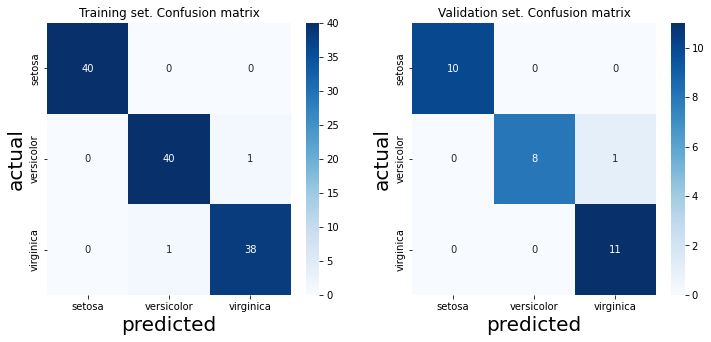

In [19]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import matplotlib.gridspec as gridspec
import seaborn as sb

usp = dfi['species'].unique()
y_train_hat=ANNmodel.predict(x_train)
y_valid_hat=ANNmodel.predict(x_valid)

cm_labels = dfi['species'].unique()
cm_tr = confusion_matrix(np.argmax(y_train.to_numpy(),axis=1), np.argmax(y_train_hat,axis=1))
cm_tt = confusion_matrix(np.argmax(y_valid.to_numpy(),axis=1), np.argmax(y_valid_hat,axis=1))

fig=plt.figure(figsize=(12, 5))
gs = gridspec.GridSpec(nrows=1, ncols=2, width_ratios=[1, 1])

ax00 = fig.add_subplot(gs[0, 0], title="Training set. Confusion matrix")
sb.heatmap(pd.DataFrame(cm_tr, columns=cm_labels, index=cm_labels), ax=ax00, cmap=plt.cm.Blues, annot = True)
ax00.set_xlabel("predicted", fontsize = 20)
ax00.set_ylabel("actual", fontsize = 20)

ax01=fig.add_subplot(gs[0, 1], title="Validation set. Confusion matrix")
sb.heatmap(pd.DataFrame(cm_tt, columns=cm_labels, index=cm_labels), ax=ax01, cmap=plt.cm.Blues, annot = True)
ax01.set_xlabel("predicted", fontsize = 20)
ax01.set_ylabel("actual", fontsize = 20)
plt.show()

<div class="warn">
    
This 3 principal components-based ML does almost as good as the 4 features ML developped in [Exercice 3](./Iris3-ExoCorrigé.ipynb). It is a modest lowering of the features space, but this simple example examplifies the interest and relevance of doing **data compression**.
</div>

In [20]:
vID.end()

**End at:** Thursday 30 June 2022, 12:36:44  
**Duration:** 00:01:28 871ms

<p style="text-align: center"><img width="800px" src="./svg/logoEnd.svg" style="margin-left:auto; margin-right:auto"/></p>